# 미래 예측 데이터 분석(프로야구 선수의 다음 해 연봉 예측)

김보람  
2023-05-18

# ref

[python-data-analysis
data](https://github.com/yoonkt200/python-data-analysis/blob/master/data/picher_stats_2017.csv)

[Data Source](http://www.statiz.co.kr/)

[이것이 데이터 분석이다 with
파이썬](https://www.aladin.co.kr/shop/wproduct.aspx?ISBN=K032637599&start=pnaver_02)

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [193]:
import matplotlib as mpl

# dataset

In [127]:
picher = 'picher_stats_2017.csv'

In [128]:
batter = 'batter_stats_2017.csv'

In [129]:
picher= pd.read_csv(picher)
batter= pd.read_csv(batter)

In [130]:
picher.columns

In [131]:
batter.columns

In [132]:
print(picher.shape)
print(batter.shape)

(152, 22)
(191, 21)

In [133]:
picher['연봉(2018)'].describe()

In [134]:
picher['연봉(2017)'].describe()

In [135]:
picher['WAR'].describe()

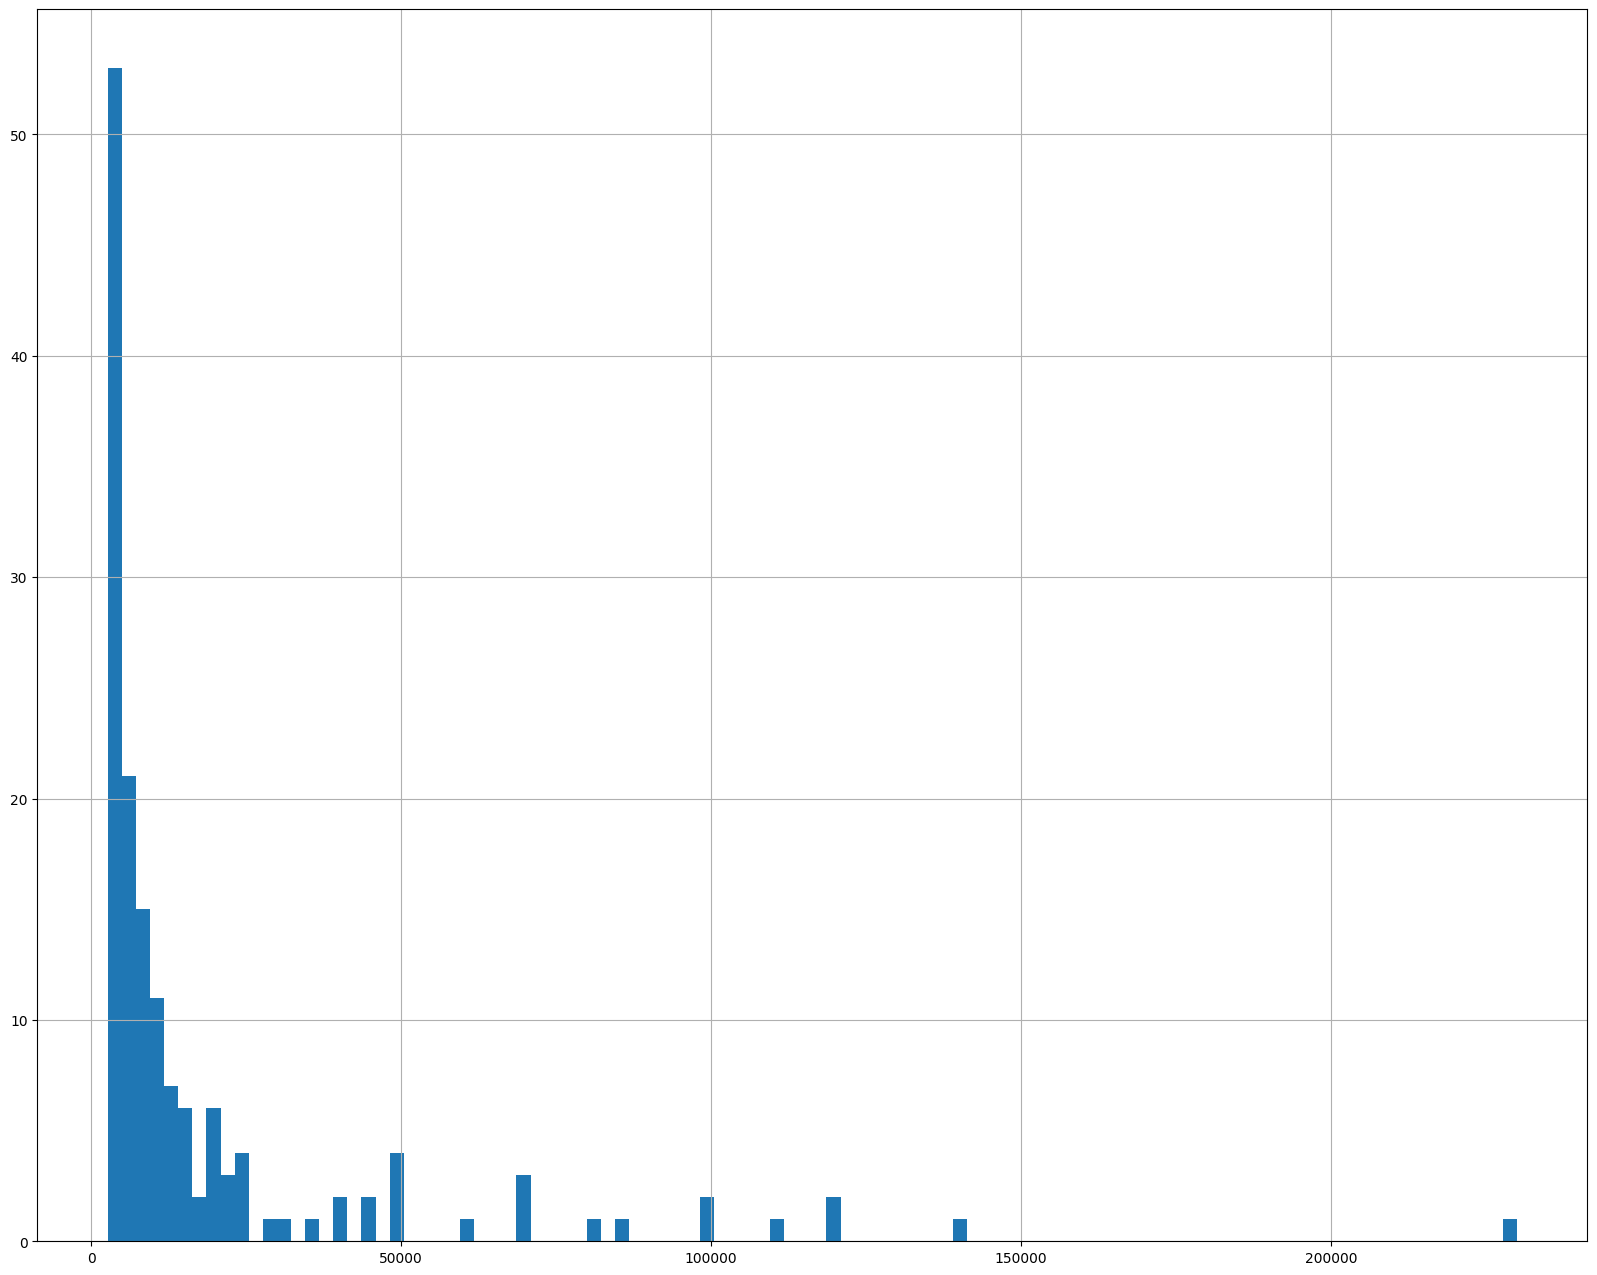

In [136]:
picher['연봉(2018)'].hist(bins=100)

/home/coco/anaconda3/envs/py38/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  func(*args, **kwargs)
/home/coco/anaconda3/envs/py38/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 48393 (\N{HANGUL SYLLABLE BONG}) missing from current font.
  func(*args, **kwargs)
/home/coco/anaconda3/envs/py38/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/coco/anaconda3/envs/py38/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48393 (\N{HANGUL SYLLABLE BONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)

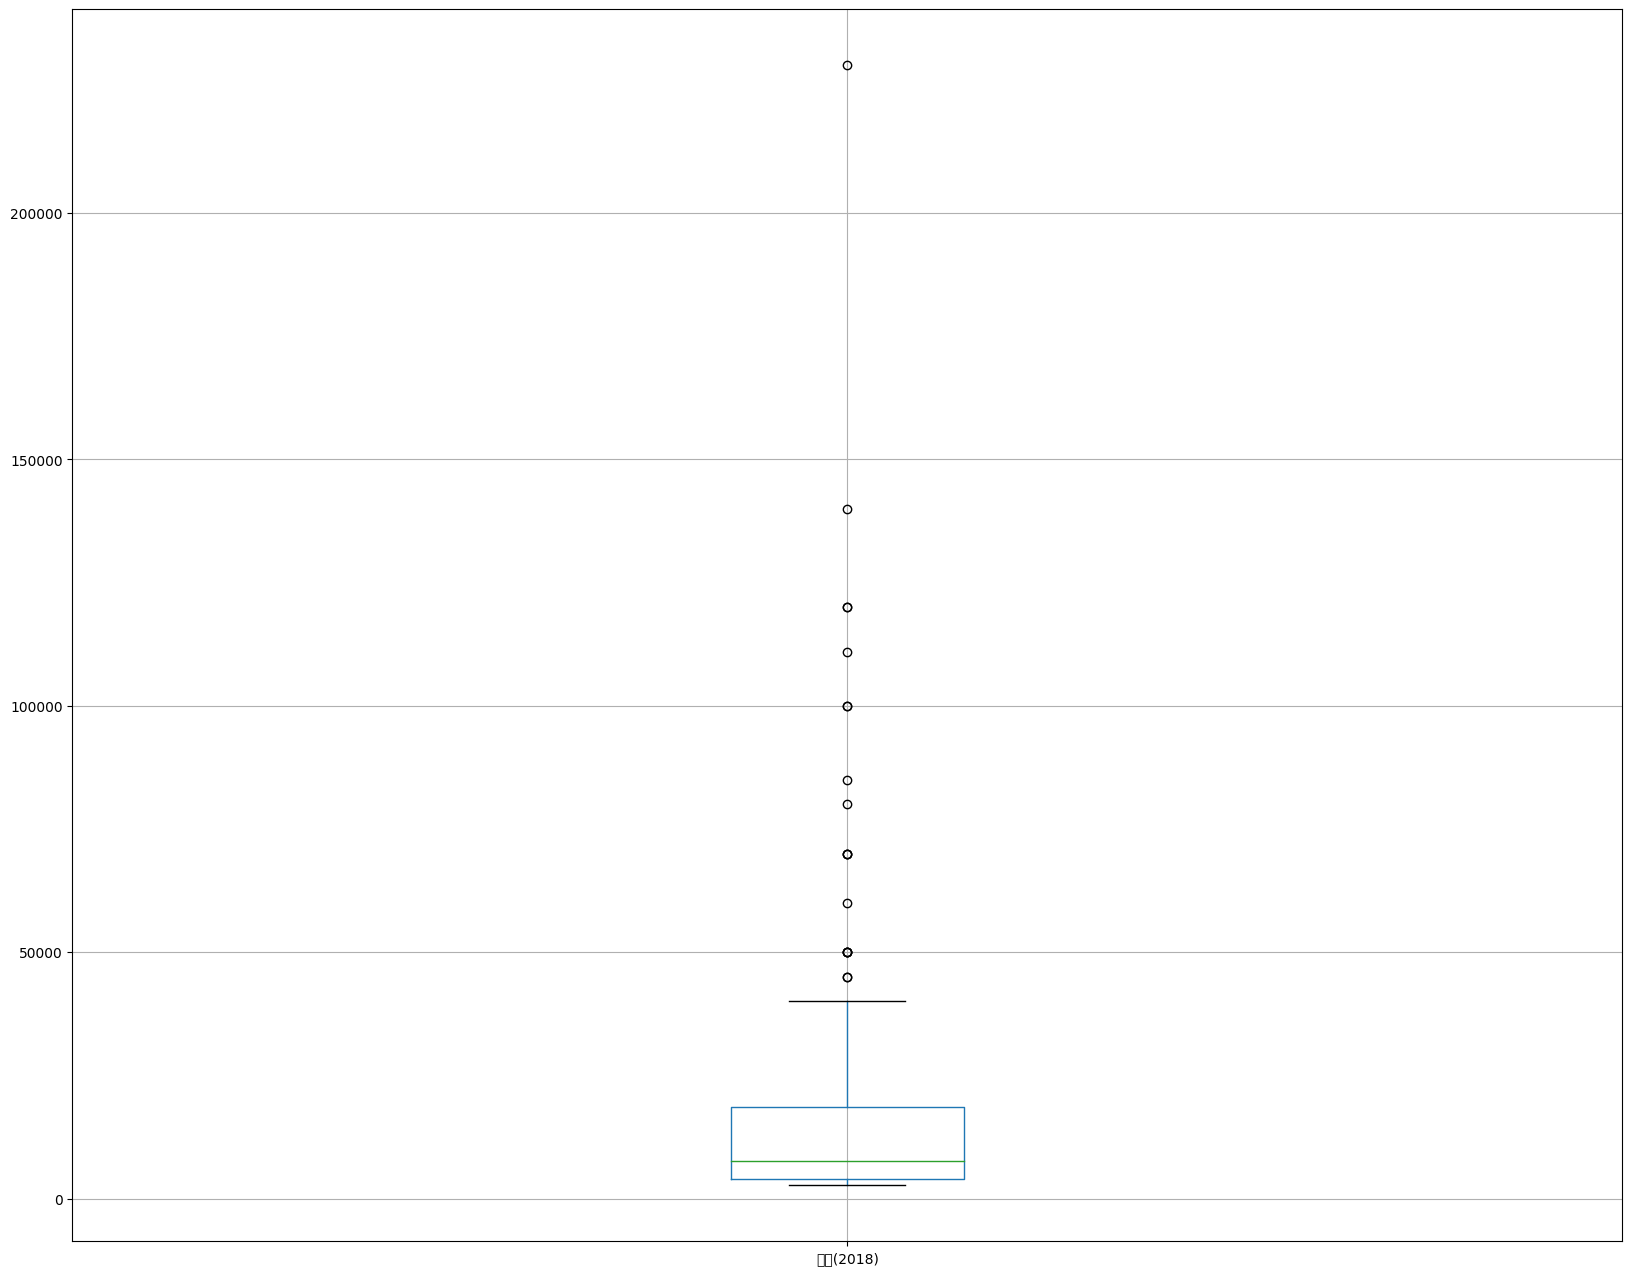

In [137]:
picher.boxplot(column=['연봉(2018)']);

In [138]:
picher_features_df = picher[['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)']]

In [230]:
# ctrl(cmd) + / : 주석처리를 풀었다 했다 

import matplotlib.pyplot as plt
 # window의 한글 폰트 설정
plt.rc('font',family='Abyssinica SIL') #윈도우의 경우

# plt.rc('font', family='AppleGothic') #맥의 경우

plt.rc('axes', unicode_minus=False) #마이너스 폰트 깨지는 것 대비

# 그래프가 노트북 안에 보이게 하기 위해
%matplotlib inline

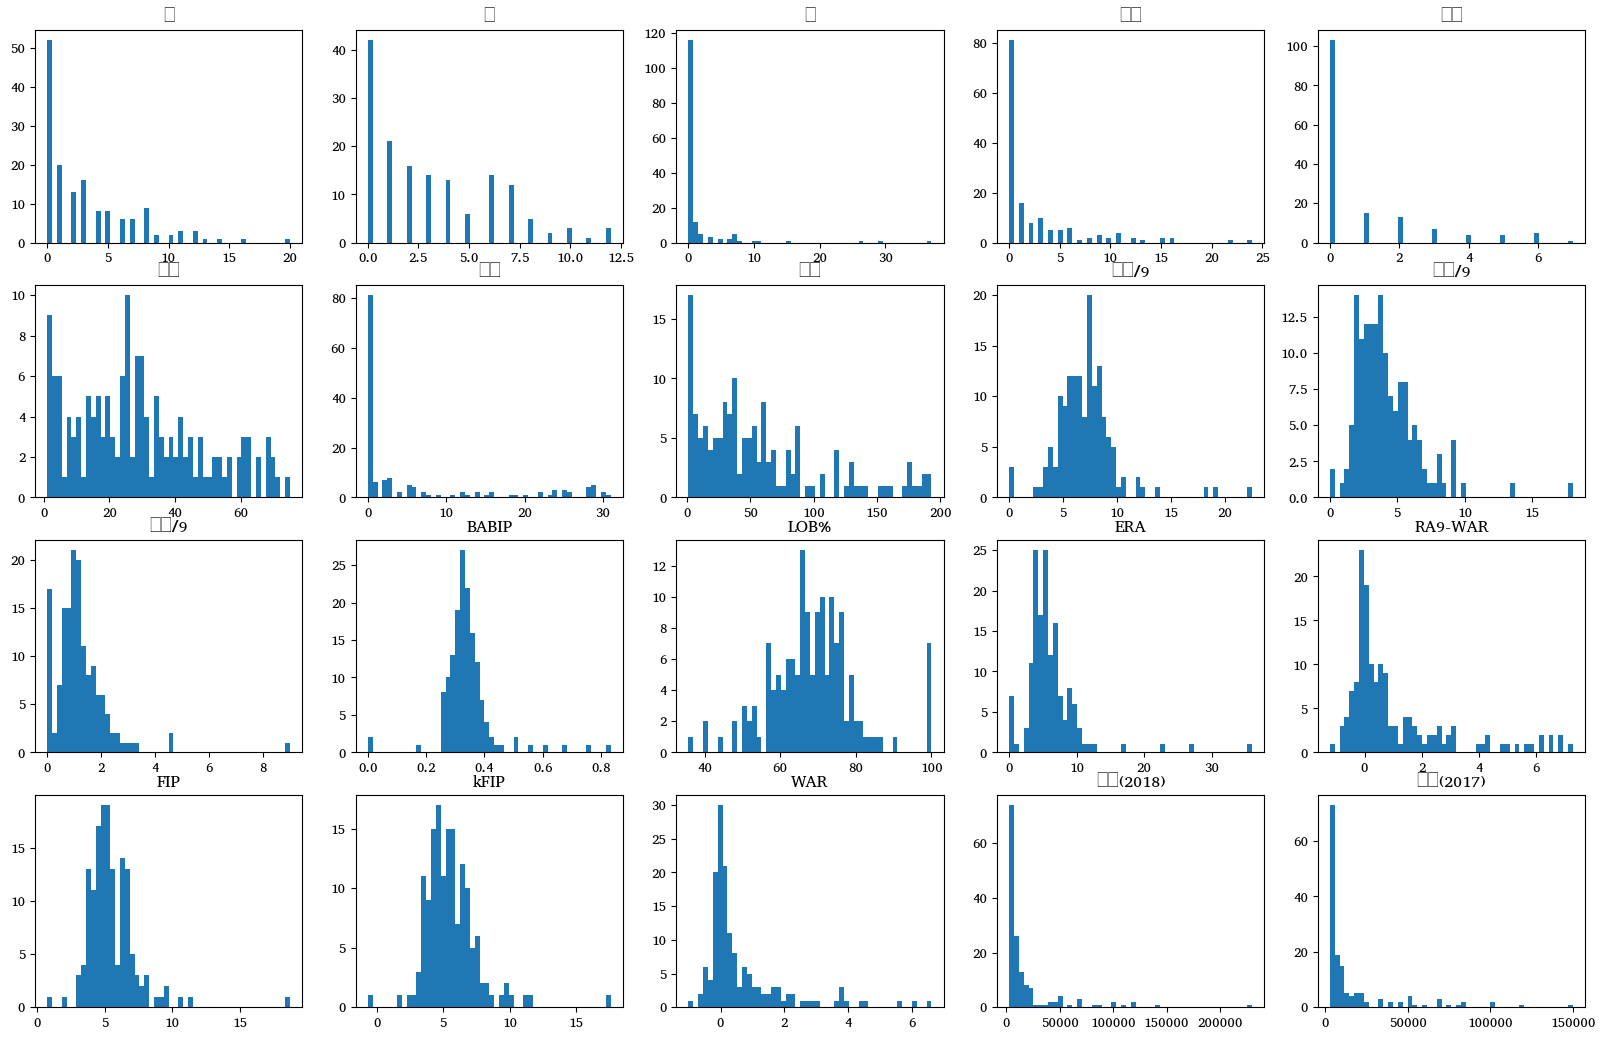

In [231]:
def plot_hist_each_column(df):
    plt.rcParams['figure.figsize']=[20,16]
    fig=plt.figure(1)
    for i in range(len(df.columns)):
        ax = fig.add_subplot(5,5,i+1)
        plt.hist(df[df.columns[i]], bins=50)
        ax.set_title(df.columns[i])
    plt.show()
    
plot_hist_each_column(picher_features_df);

-   피처의 정규화 실시

# 피처 스케일링

In [140]:
pd.options.mode.chained_assignment=None

-   float모양으로 출력

In [141]:
def standard_scaling(df, scale_columns):
    for col in scale_columns:
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col] = df[col].apply(lambda x: (x-series_mean)/series_std)
        return df

In [179]:
scale_columns = [ '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)']
picher_df = standard_scaling(picher, scale_columns)
picher_df = picher_df.rename(columns={'연봉(2018)':'y'})
picher_df.head()

`-` 범주형은 원핫 인코딩

In [143]:
team_encoding = pd.get_dummies(picher_df['팀명'])
picher_df = picher_df.drop('팀명', axis=1)
picher_df = picher_df.join(team_encoding)


In [144]:
team_encoding.head()

In [145]:
picher_df.head()

# 분석

## 데이터 분리

In [146]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt


In [147]:
X=picher_df[picher_df.columns.difference(['선수명','y'])]
y=picher_df['y']


In [148]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=19)

## lrnr

In [149]:
lr = linear_model.LinearRegression()


## fit

In [150]:
model = lr.fit(X_train, y_train)

In [151]:
print(lr.coef_)

[-1.66433649e+04 -1.00005486e+02 -5.03120671e+04 -1.56086205e+03
  1.57200472e+03 -7.47049524e+02 -1.18666920e+02 -5.23546876e+02
  2.14736071e+03  8.98376390e+02  7.76920737e+03  3.91969663e+04
 -1.25668595e+02 -8.92118013e+02  4.49911172e+02  3.22164149e+03
  7.77935715e+02 -2.81055645e+03  1.90870829e+03 -4.92026373e+02
 -5.21324705e+01  2.36025301e+02  7.63803603e-01  1.69794484e+01
  4.15729514e+02  3.61384063e+03 -2.07081858e+02  1.78400390e+04]

-   학습된 계수

## evaluate

In [152]:
import statsmodels.api as sm

In [153]:
X_train = sm.add_constant(X_train)   # X_train데이터에 상수열 추가 
model = sm.OLS(y_train, X_train).fit()
model.summary()

-   `OLS` : Ordinary Least Squares방법을 사용한 회귀 모델 정의 작업

-   pvalue가 0.05미만인 데이터: `WAR`, `연봉(2017)`, `한화`

# coef 시각화

`-` 회귀 계수 리스트 반환

In [154]:
coefs = model.params.tolist()

In [155]:
coefs_series= pd.Series(coefs)

`-` 변수명 리스트 반환

In [156]:
x_labels=model.params.index.tolist()

`-` 회귀 계수 출력

/home/coco/anaconda3/envs/py38/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 46160 (\N{HANGUL SYLLABLE DU}) missing from current font.
  func(*args, **kwargs)
/home/coco/anaconda3/envs/py38/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 47215 (\N{HANGUL SYLLABLE ROS}) missing from current font.
  func(*args, **kwargs)
/home/coco/anaconda3/envs/py38/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  func(*args, **kwargs)
/home/coco/anaconda3/envs/py38/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 48380 (\N{HANGUL SYLLABLE BOL}) missing from current font.
  func(*args, **kwargs)
/home/coco/anaconda3/envs/py38/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 45367 (\N{HANGUL SYLLABLE NES}) missing from current font.
  func(*args, **kwargs)
/home/coco/anaconda3/envs/py38/lib/python3.8/site-packages/IPy

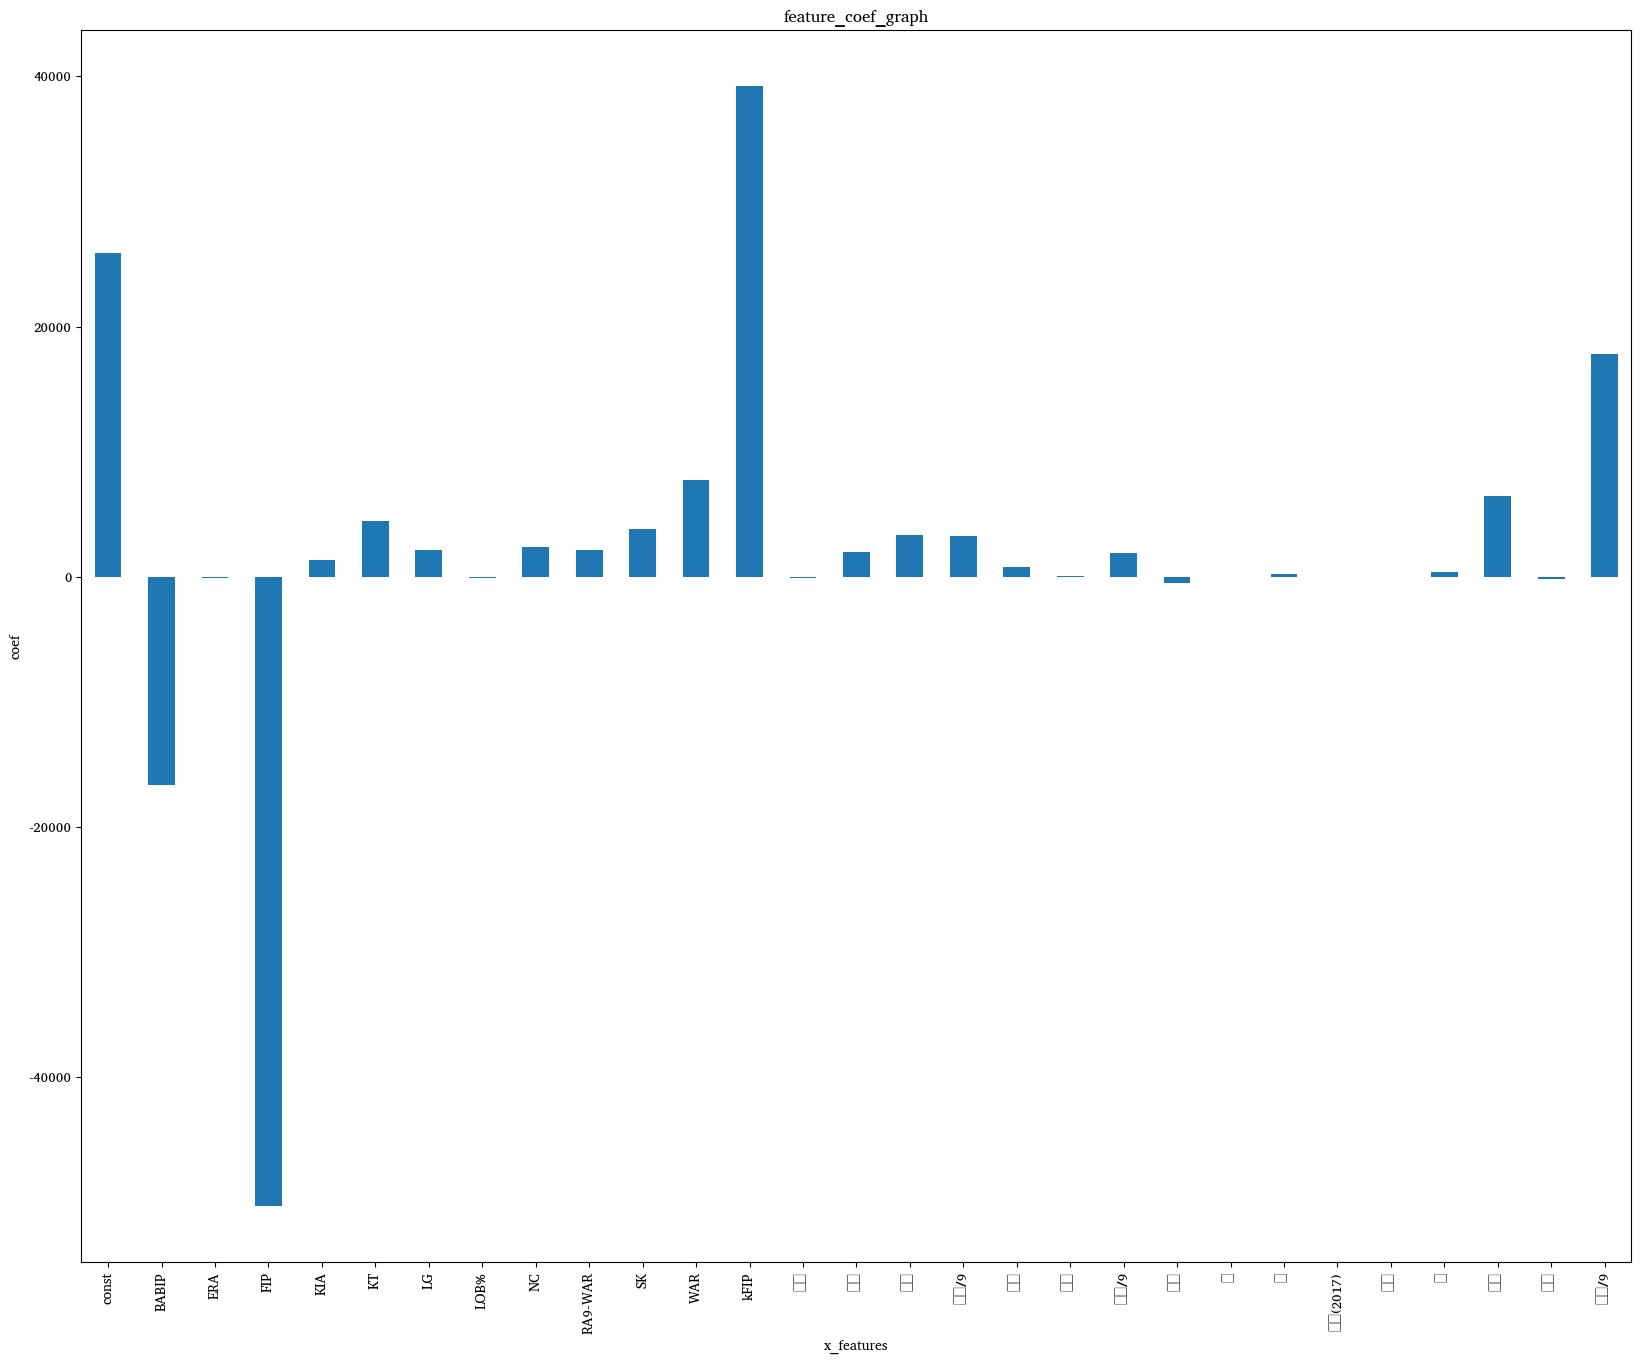

In [232]:
ax=coefs_series.plot(kind='bar');
ax.set_title('feature_coef_graph')
ax.set_xlabel('x_features')
ax.set_ylabel('coef')
ax.set_xticklabels(x_labels)

# 결과 정리

| 피처명    | 유의미한 피처 | 영향력이 큰 피처 |
|-----------|---------------|------------------|
| FIP       | X             | O                |
| WAR       | O             | O                |
| 홈런      | X             | O                |
| 작년 연봉 | O             | O                |
| 팀(한화)  | O             | $\Delta$         |

## $R^2$ SCORE

In [158]:
X = picher_df[picher_df.columns.difference(['선수명','y'])]
y = picher_df['y']
X_trian, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=19)

In [159]:
lr=  linear_model.LinearRegression()
model=lr.fit(X_train, y_train)
print(model.score(X_train, y_train))



0.9129870505440939

In [160]:
X_test = sm.add_constant(X_test)

In [161]:
print(model.score(X_test, y_test))


0.87323834388485

이ㅏ거 왜 안대

## RMSE score

In [162]:
y_predictions = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_predictions)))

7989.160309407914

In [165]:
y_predictions = lr.predict(X_test)
print(sqrt(mean_squared_error(y_test,y_predictions)))

15091.589840279374

# 상관관계

``` python
corr = picher_df[scale_columns].corr(method='pearson')
show_cols = ['win', 'lose', 'save', 'hold', 'blon', 'match', 'start', 
             'inning', 'strike3', 'ball4', 'homerun', 'BABIP', 'LOB', 
             'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '2017']

# corr 행렬 히트맵을 시각화합니다.
plt.rc('font', family='NanumGothicOTF')
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 15},
            yticklabels=show_cols,
            xticklabels=show_cols)

plt.tight_layout()
plt.show()
```

# 다중공산성

In [185]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [186]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

`-` VIF

-   Variance Inflation Factior

-   분산 팽창 요인

-   계수가 10~15 넘으면 다중공산성

# 절절한 피처로 다시 학습

In [187]:
X = picher_df[['FIP', 'WAR', '볼넷/9', '삼진/9', '연봉(2017)']]
y = picher_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [188]:
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

In [189]:
print(model.score(X_train, y_train)) # train R2 score
print(model.score(X_test, y_test)) # test R2 score

0.9150591192570362
0.9038759653890193

In [190]:
y_predictions = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_predictions))) # train RMSE score
y_predictions = lr.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_predictions))) # test RMSE score

7893.462873347693
13141.866063588841

In [191]:
X = picher_df[['FIP', 'WAR', '볼넷/9', '삼진/9', '연봉(2017)']]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

# 분석 결과 시각화

-   회귀분석을 통해 얻어낸 예측연봉과 2018년의 실제연봉 데이터 비교

In [204]:
X= picher_df[['FIP', 'WAR', '볼넷/9', '삼진/9', '연봉(2017)']]
predict_2018_salary = lr.predict(X)
picher_df['예측연봉(2018)'] = pd.Series(predict_2018_salary)

In [206]:
picher_df.head()

In [202]:
picher2 = picher[['선수명','연봉(2017)']]
picher2.head()

In [209]:
result_df = picher_df.sort_values(by=['y'], ascending=False)
result_df

In [210]:
result_df.drop(['연봉(2017)'],axis=1, inplace=True, errors='ignore')
result_df

In [212]:
result_df = result_df.merge(picher2, on = ['선수명'], how='left')
result_df

In [216]:
result_df = result_df[['선수명', 'y', '예측연봉(2018)','연봉(2017)_x']]

In [217]:
result_df

In [218]:
result_df.columns=['선수명', '실제연봉(2018)', '예측연봉(2018)', '작년연봉(2017)']

In [219]:
result_df

`-` 재계약으로 연봉이 변화한 선무 확인

In [221]:
result_df = result_df[result_df['작년연봉(2017)']!= result_df['실제연봉(2018)']]
result_df = result_df.reset_index()
result_df.head()

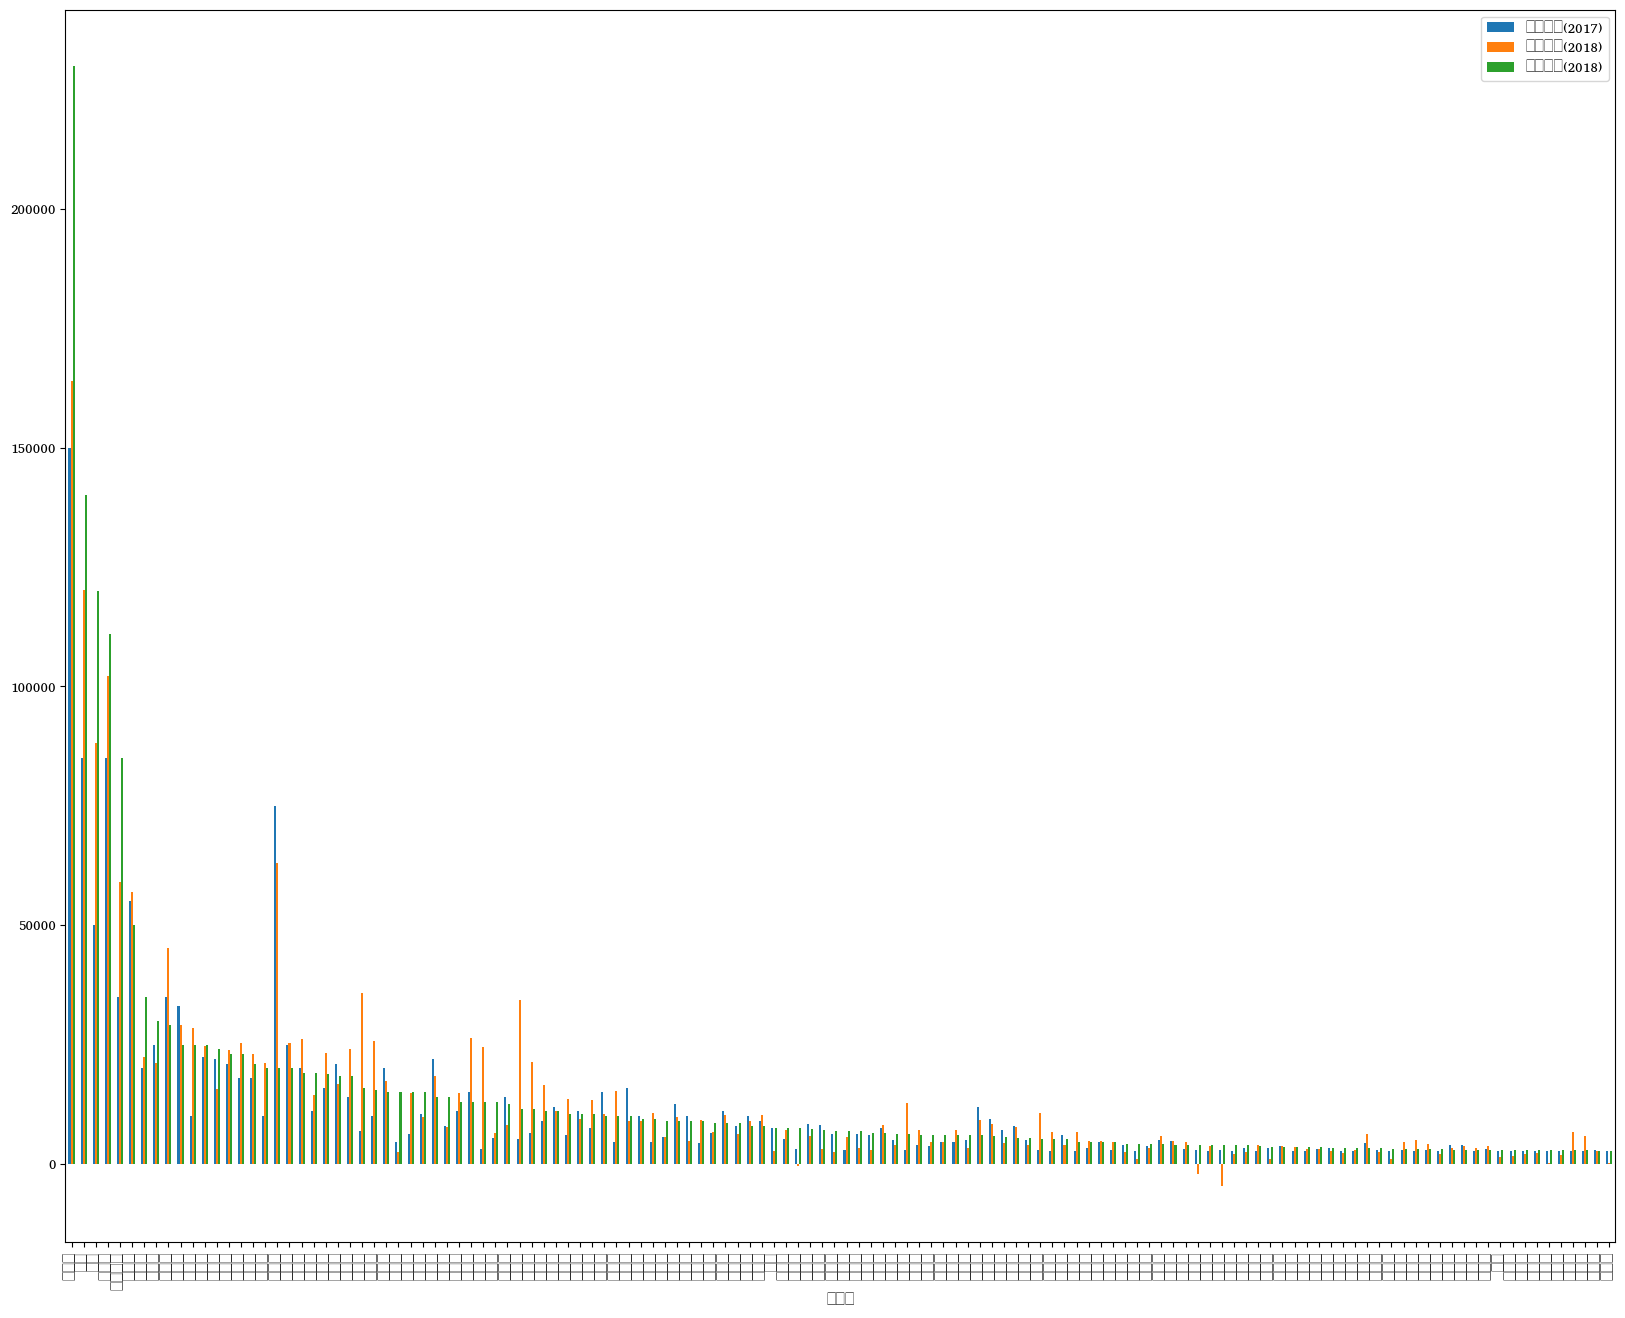

In [233]:
result_df.plot(x='선수명', y=['작년연봉(2017)','예측연봉(2018)','실제연봉(2018)'],kind='bar');